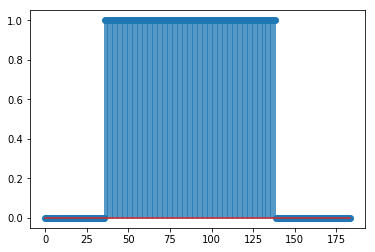

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write

FRAME_SIZE = 2048
threshold = 1800000000
def ece420ProcessFrame(frame):
    isVoiced = 0
    Es = 0

    #### YOUR CODE HERE ####
    for i in range(len(frame)):
        Es += frame[i]**2
    if Es > threshold:
        isVoiced = 1
    return isVoiced


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

numFrames = int(len(data) / FRAME_SIZE)
framesVoiced = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    framesVoiced[i] = ece420ProcessFrame(frame.astype(float))

plt.figure()
plt.stem(framesVoiced)
plt.show()

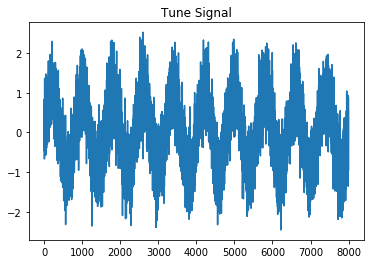

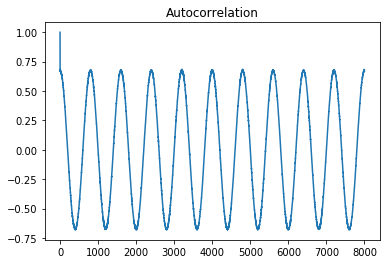

In [81]:

import numpy as np
import matplotlib.pyplot as plt

fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 10        # Tune Frequency is 10 Hz
tune = np.sin(2*np.pi*freq*t)

# Add some Gaussian noise 
tune += np.random.normal(0, 0.5, duration * fs)

plt.figure()
plt.plot(tune)
plt.title('Tune Signal')

# Start a new figure for your autocorrelation plot 
plt.figure() 

# Your code here
norm = np.zeros(len(tune))
for i in range(len(tune)):
    norm[i] = tune[i]**2

shift = np.zeros(len(tune))
Rxx = np.zeros(len(tune))

for l in range(len(tune)):
    for i in range(len(tune)):
        shift[i] = tune[i]*tune[i-l]
    Rxx[l] = np.sum(shift)/np.sum(norm)

plt.plot(Rxx)

plt.title("Autocorrelation")

# Only call plt.show() at the very end of the script 
plt.show()

In [ ]:
##Assignment 2 Question##
#Based on the plot above, the value of lag l that maximizes Rxx is around 700~800 samples.
#This is roughly about 0.1s of the time duration of the tune signal, which is about 10 Hz.